In [1]:
# Initial Settings
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab_Notebooks/DMLab/RC_System

In [2]:
# Library Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
train_df = pd.read_csv('train.csv')

train_df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
699995,TRAIN_699995,USER_73006,BOOK_188174,9,35.0,"berlin, berlin, germany",Brandherd.,Patricia Cornwell,2001.0,Hoffmann &amp; Campe
699996,TRAIN_699996,USER_73006,BOOK_191225,9,35.0,"berlin, berlin, germany",Hostage,R. D. Zimmerman,1998.0,Delta Trade Paperbacks
699997,TRAIN_699997,USER_73006,BOOK_191561,9,35.0,"berlin, berlin, germany",Parisian Lives (Stonewall Inn Editions),Samuel M. Steward,1989.0,St Martins Pr
699998,TRAIN_699998,USER_73006,BOOK_195057,0,35.0,"berlin, berlin, germany",Ich bin ein deutscher StaatsbÃ¼rger jÃ¼dischen...,Ignatz Bubis,1993.0,Kiepenheuer &amp; Witsch


In [4]:
# Dataset Information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   700000 non-null  object 
 1   User-ID              700000 non-null  object 
 2   Book-ID              700000 non-null  object 
 3   Book-Rating          700000 non-null  int64  
 4   Age                  700000 non-null  float64
 5   Location             700000 non-null  object 
 6   Book-Title           700000 non-null  object 
 7   Book-Author          700000 non-null  object 
 8   Year-Of-Publication  700000 non-null  float64
 9   Publisher            700000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 53.4+ MB


In [5]:
# Dataset Description
train_df.describe()

,Book-Rating,Age,Year-Of-Publication
count,700000.000000,700000.000000,700000.000000
mean,2.845243,37.024070,1969.322870
std,3.857112,12.304245,226.308301
min,0.000000,0.000000,-1.000000
25%,0.000000,31.000000,1991.000000
50%,0.000000,35.000000,1997.000000
75%,7.000000,42.000000,2001.000000
max,10.000000,244.000000,2021.000000


In [6]:
# Check for missing values
train_df.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [7]:
# Check for unique values
train_df['User-ID'].value_counts()

User-ID
USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_03411     3453
USER_17715     3429
              ...  
USER_35806        1
USER_06405        1
USER_35809        1
USER_35814        1
USER_41870        1
Name: count, Length: 66004, dtype: int64

In [8]:
train_df['Book-ID'].value_counts()

Book-ID
BOOK_097861    1952
BOOK_050555     708
BOOK_114855     610
BOOK_206174     591
BOOK_084346     581
               ... 
BOOK_147288       1
BOOK_136631       1
BOOK_126359       1
BOOK_092027       1
BOOK_195439       1
Name: count, Length: 214652, dtype: int64

In [9]:
train_df['Location'].value_counts()

Location
n/a, n/a, n/a                              11161
toronto, ontario, canada                   10514
little canada, minnesota, usa               6458
chicago, illinois, usa                      6369
ft. stewart, georgia, usa                   5819
                                           ...  
lac la biche, alberta, canada                  1
moedling, niederoesterreich, austria           1
toulouse, mipy, france                         1
cool, city, usa                                1
east kilbride, scotland, united kingdom        1
Name: count, Length: 18043, dtype: int64

In [10]:
train_df['Book-Title'].value_counts()

Book-Title
Wild Animus                                    1952
The Da Vinci Code                               718
The Nanny Diaries: A Novel                      644
The Lovely Bones: A Novel                       610
A Painted House                                 602
                                               ... 
A Whisper of Violets                              1
For All Time (Harlequin Temptation, No 232)       1
Catherine the Great: A Biography                  1
Islam and the West: A Dialog                      1
Abschied von Eden.                                1
Name: count, Length: 192510, dtype: int64

In [11]:
train_df['Book-Author'].value_counts()

Book-Author
Stephen King          6986
Nora Roberts          5647
John Grisham          4220
James Patterson       4049
Mary Higgins Clark    3171
                      ... 
David Boyle              1
Todd McEwens             1
Don  Wade                1
James Ogilvy             1
Ignatz Bubis             1
Name: count, Length: 82481, dtype: int64

In [12]:
train_df['Publisher'].value_counts()

Publisher
Ballantine Books            23946
Pocket                      22057
Berkley Publishing Group    18995
Harlequin                   17381
Warner Books                17020
                            ...  
Veritas Pr                      1
Harbor Publishing               1
Gleim Pubns                     1
Starling Editions               1
Seven Oaks Pr                   1
Name: count, Length: 13999, dtype: int64

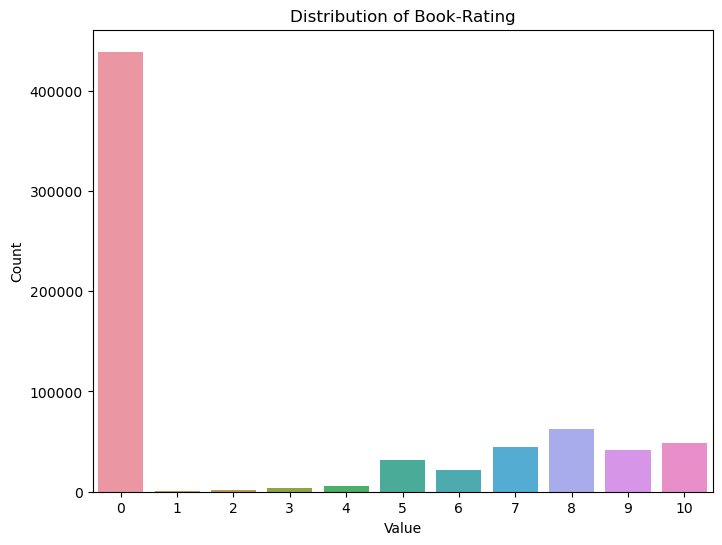

In [13]:
# Distribution of Book-Rating
rating_df = train_df['Book-Rating'].value_counts().reset_index()
rating_df.columns = ['value', 'counts']

plt.figure(figsize=(8, 6))
sns.barplot(x='value', y='counts', data=rating_df)
plt.title('Distribution of Book-Rating')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

c:\Users\seokc\Tool\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


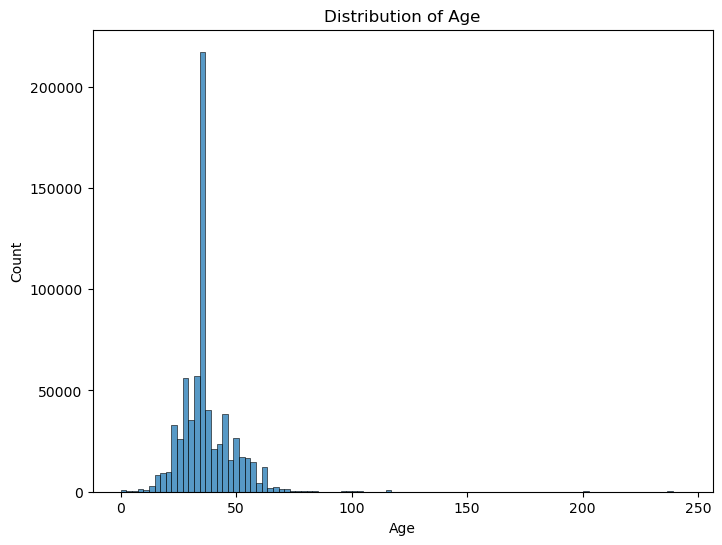

In [14]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=100)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

c:\Users\seokc\Tool\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


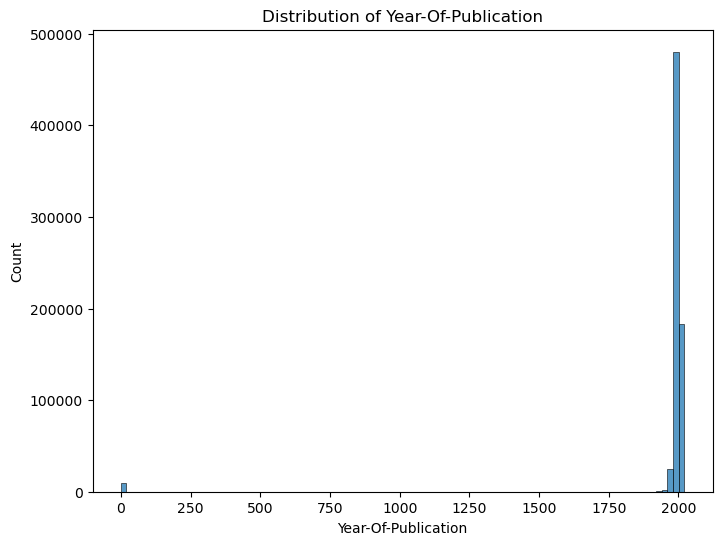

In [15]:
# Distribution of Year-Of-Publication
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Year-Of-Publication'], bins=100)
plt.title('Distribution of Year-Of-Publication')
plt.xlabel('Year-Of-Publication')
plt.ylabel('Count')
plt.show()

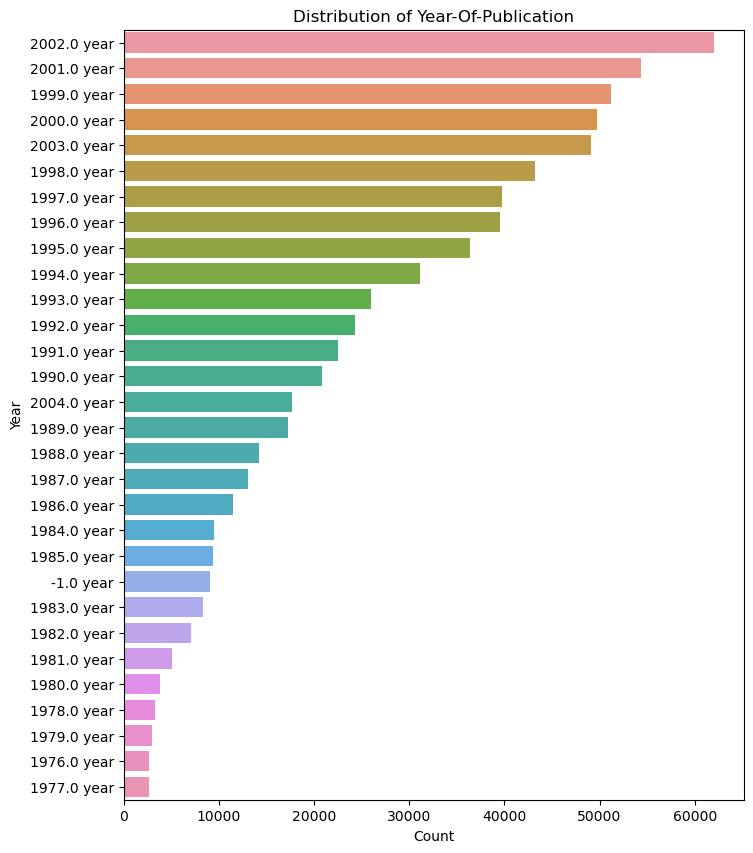

In [16]:
# Top 30 Year-Of-Publication
yof_df = train_df['Year-Of-Publication'].value_counts().reset_index()
yof_df.columns = ['value', 'counts']
yof_df['value'] = yof_df['value'].astype(str) + ' year'
yof_df = yof_df.sort_values('counts', ascending=False).head(30)

plt.figure(figsize=(8, 10))
sns.barplot(x='counts', y='value', data=yof_df, orient='h')
plt.title('Distribution of Year-Of-Publication')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

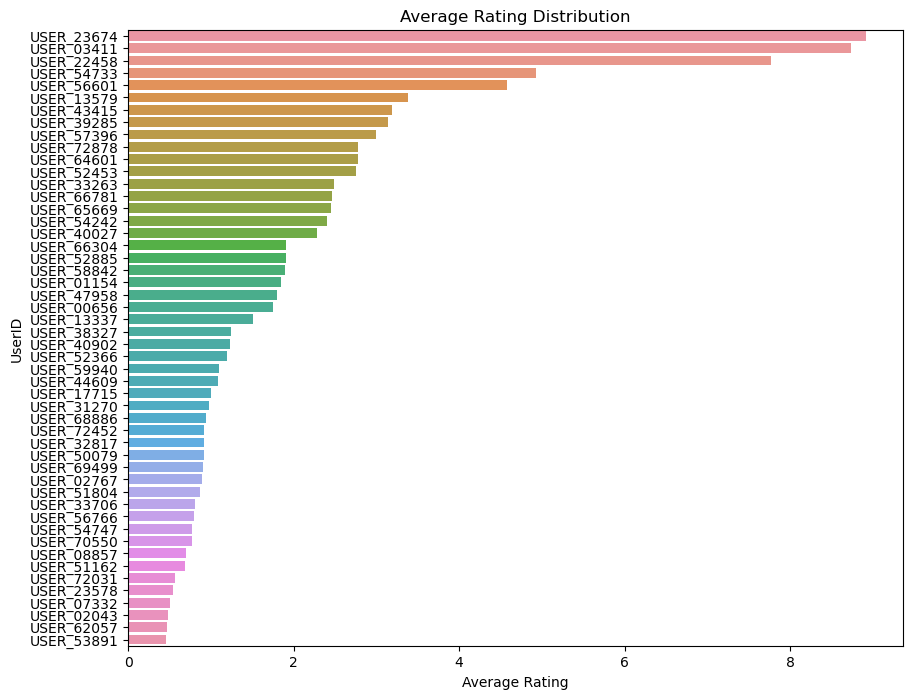

In [17]:
# Average Rating Distribution groupby 'UserID'
userID_df = train_df['User-ID'].value_counts().reset_index()
userID_df.columns = ['User-ID', 'counts']
userID_df = pd.merge(train_df, userID_df)
userID_df = userID_df[userID_df['counts'] > 1000]
userID_df = userID_df.groupby('User-ID')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='User-ID', data=userID_df.head(50))
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('UserID')
plt.show()

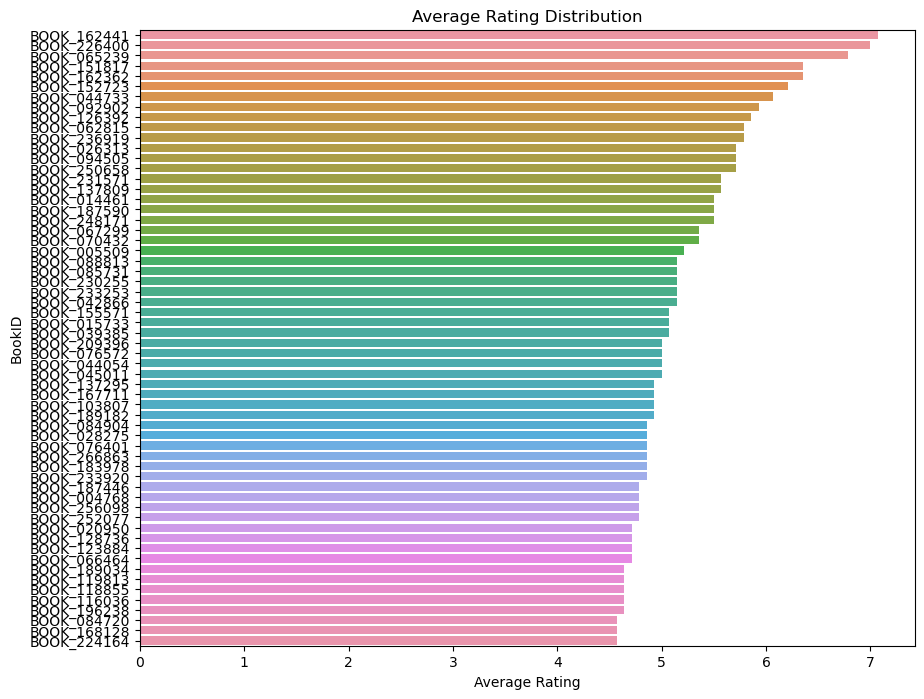

In [18]:
# Average Rating Distribution groupby 'BookID'
bookID_df = train_df['Book-ID'].value_counts().reset_index()
bookID_df.columns = ['Book-ID', 'counts']
bookID_df = pd.merge(train_df, bookID_df)
bookID_df = bookID_df[bookID_df['counts'] == 14]
bookID_df = bookID_df.groupby('Book-ID')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='Book-ID', data=bookID_df.head(60))
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('BookID')
plt.show()

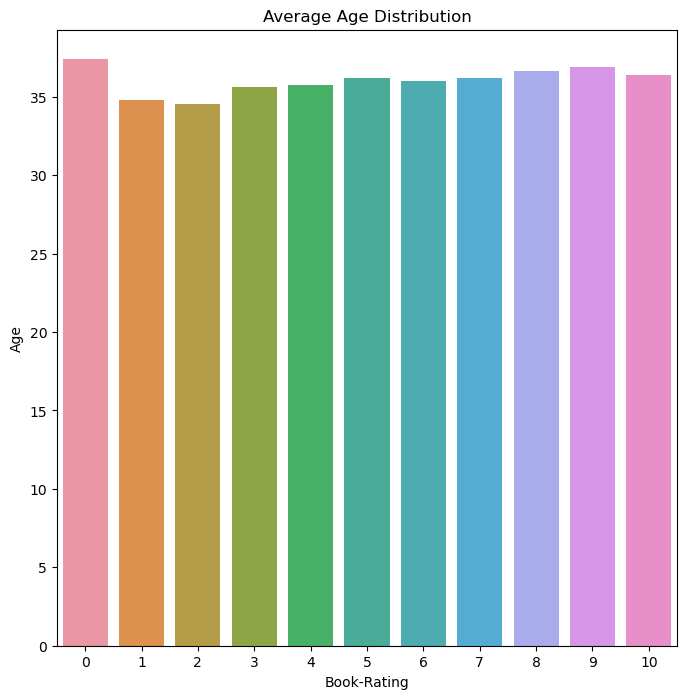

In [19]:
# Average Age Distribution groupby 'Book-Rating'
age_df = train_df.groupby('Book-Rating')['Age'].mean().reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(x='Book-Rating', y='Age', data=age_df)
plt.title('Average Age Distribution')
plt.show()

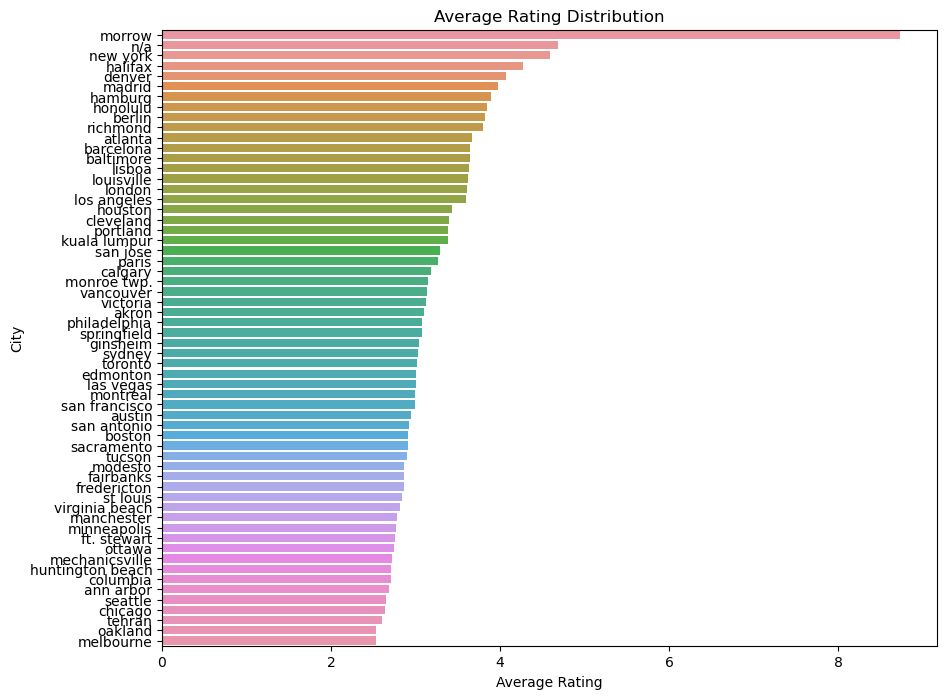

In [20]:
# Average Location Distribution groupby 'Book-Rating'
# City / State / Country
location_df = train_df
location_df['City'] = location_df['Location'].str.split(', ').str[0]
location_df['State'] = location_df['Location'].str.split(', ').str[1]
location_df['Country'] = location_df['Location'].str.split(', ').str[2]

city_df = location_df['City'].value_counts().reset_index()
city_df.columns = ['City', 'counts']
city_df = pd.merge(location_df, city_df)
city_df = city_df[city_df['counts'] > 1000]
city_df = city_df.groupby('City')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='City', data=city_df.head(60))
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

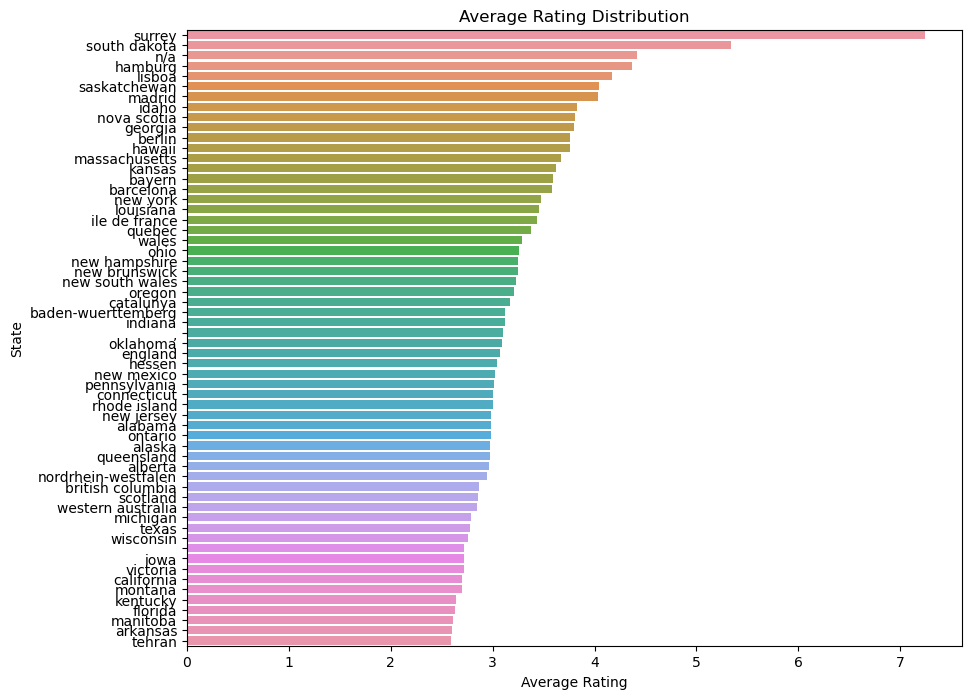

In [21]:
# Average Location Distribution groupby 'Book-Rating'
# City / State / Country
state_df = location_df['State'].value_counts().reset_index()
state_df.columns = ['State', 'counts']
state_df = pd.merge(location_df, state_df)
state_df = state_df[state_df['counts'] > 1000]
state_df = state_df.groupby('State')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='State', data=state_df.head(60))
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('State')
plt.show()

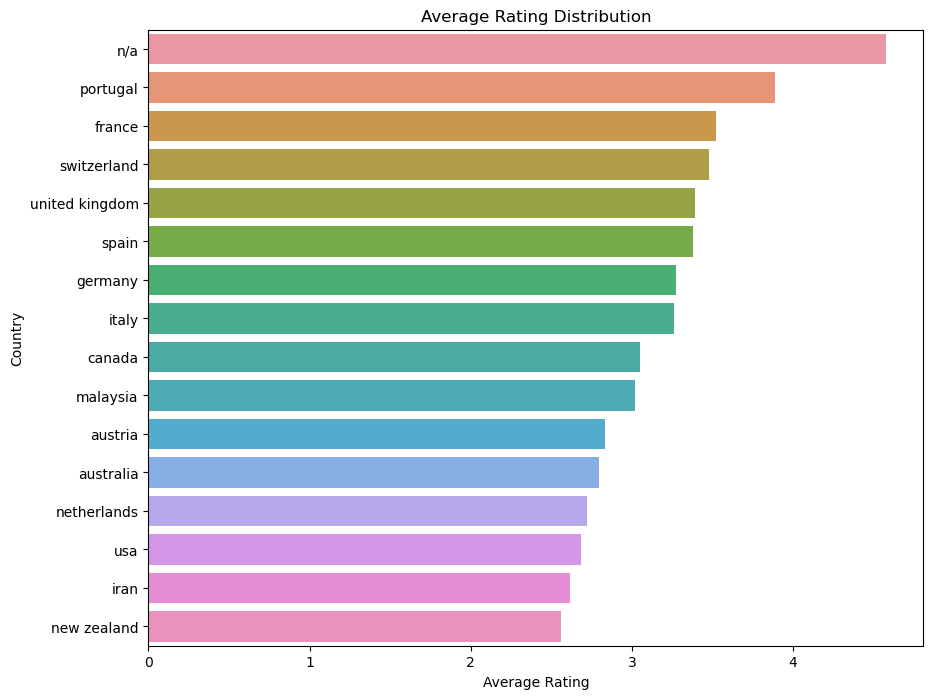

In [22]:
# Average Location Distribution groupby 'Book-Rating'
# City / State / Country
country_df = location_df['Country'].value_counts().reset_index()
country_df.columns = ['Country', 'counts']
country_df = pd.merge(location_df, country_df)
country_df = country_df[country_df['counts'] > 1000]
country_df = country_df.groupby('Country')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='Country', data=country_df)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.show()

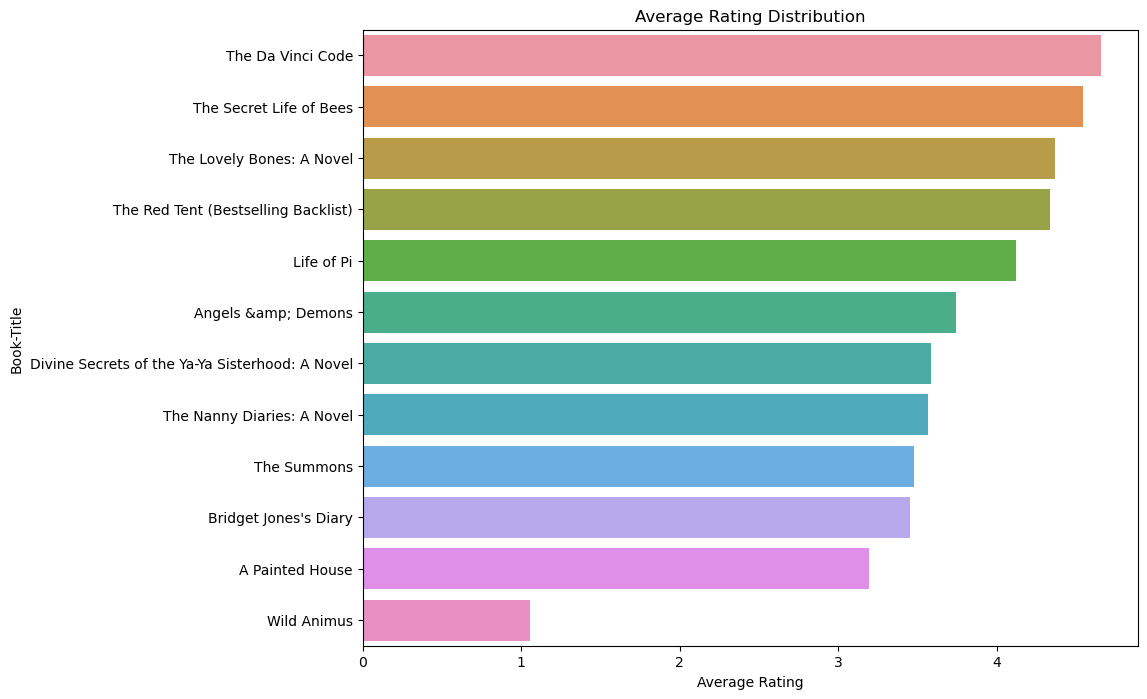

In [23]:
# Average Book-Title Distribution groupby 'Book-Rating'
title_df = train_df['Book-Title'].value_counts().reset_index()
title_df.columns = ['Book-Title', 'counts']
title_df = pd.merge(train_df, title_df)
title_df = title_df[title_df['counts'] > 500]
title_df = title_df.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='Book-Title', data=title_df)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Book-Title')
plt.show()

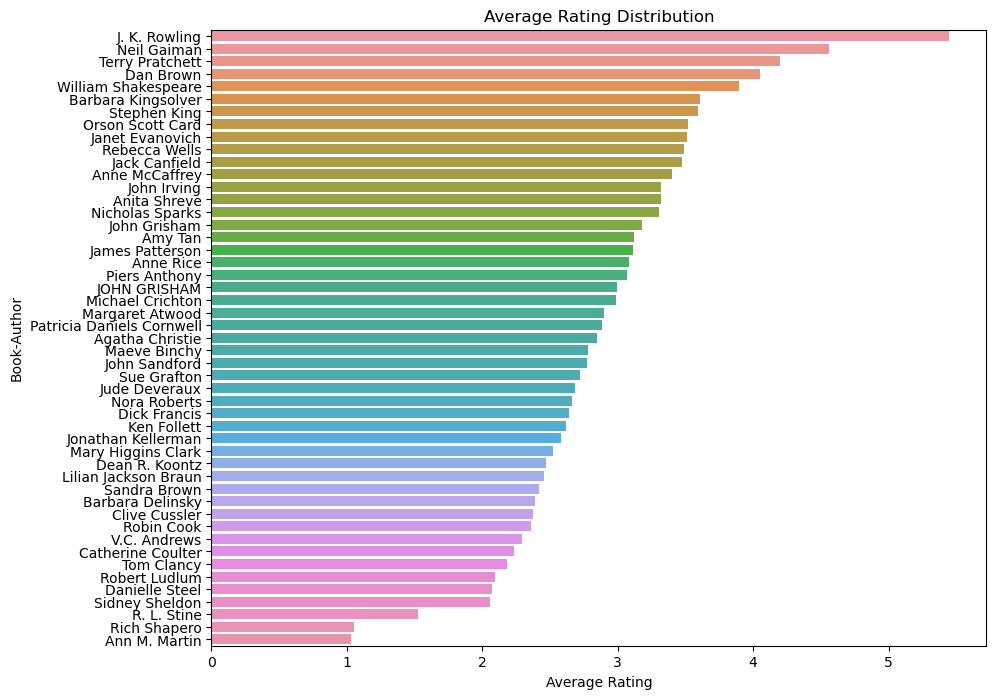

In [24]:
# Average Book-Author Distribution groupby 'Book-Rating'
author_df = train_df['Book-Author'].value_counts().reset_index()
author_df.columns = ['Book-Author', 'counts']
author_df = pd.merge(train_df, author_df)
author_df = author_df[author_df['counts'] > 1000]
author_df = author_df.groupby('Book-Author')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='Book-Author', data=author_df)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Book-Author')
plt.show()

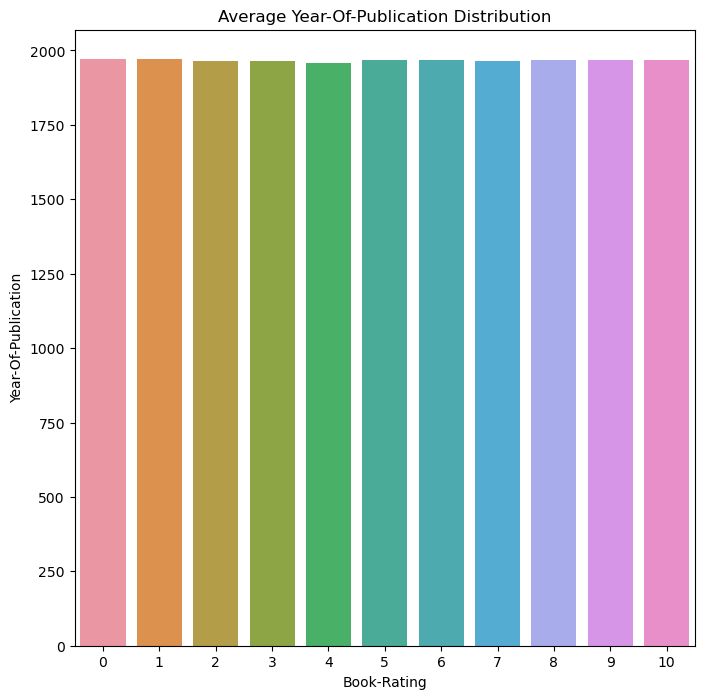

In [25]:
# Average Year-Of-Publication Distribution groupby 'Book-Rating'
yop_df = train_df.groupby('Book-Rating')['Year-Of-Publication'].mean().reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(x='Book-Rating', y='Year-Of-Publication', data=yop_df)
plt.title('Average Year-Of-Publication Distribution')
plt.show()

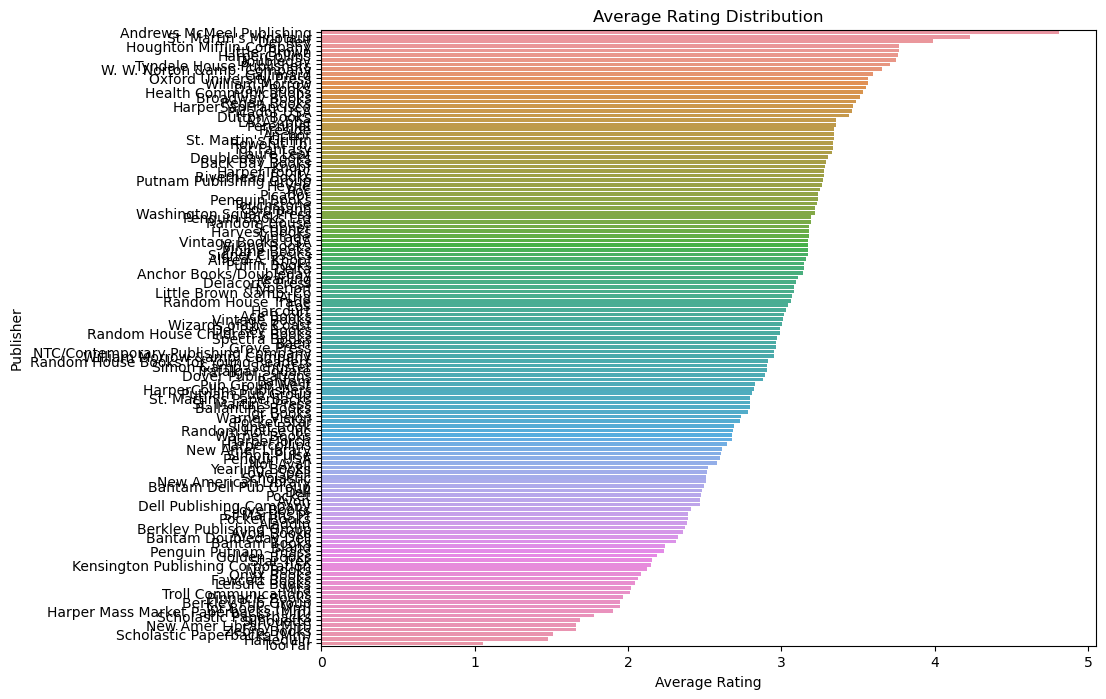

In [26]:
# Average Publisher Distribution groupby 'Book-Rating'
publisher_df = train_df['Publisher'].value_counts().reset_index()
publisher_df.columns = ['Publisher', 'counts']
publisher_df = pd.merge(train_df, publisher_df)
publisher_df = publisher_df[publisher_df['counts'] > 1000]
publisher_df = publisher_df.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Book-Rating', y='Publisher', data=publisher_df)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.show()